In [187]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [188]:
df = pd.read_excel('Вхідні дані Лабораторна 3.xlsx')
df.head()

,Група,Обєм виробництва,Прибуток,Фонд заробітної плати,Інтегр покаж вик роб часу,Плинність кадрів
0,1,40.63,3.36,0.70,0.33,висока
1,1,34.11,3.07,0.78,0.32,середня
2,1,33.61,3.45,0.67,0.35,середня
3,1,28.32,3.95,0.68,0.38,висока
4,1,35.13,3.43,0.65,0.35,висока


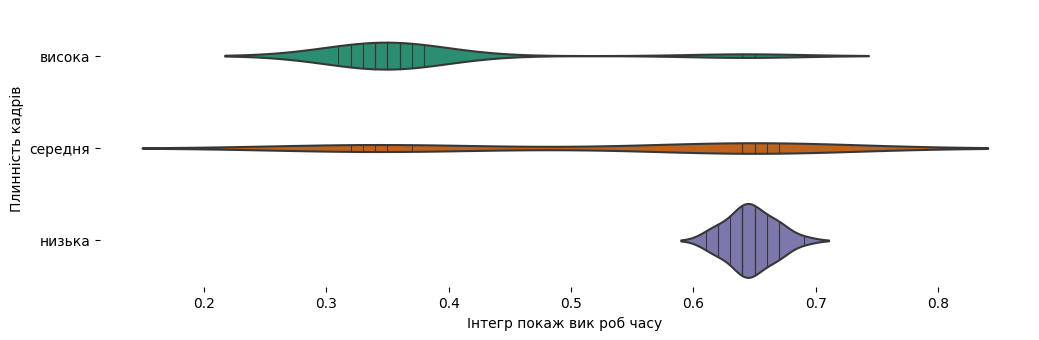

In [189]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Плинність кадрів'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Інтегр покаж вик роб часу', y='Плинність кадрів', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [190]:
df.describe()

,Група,Обєм виробництва,Прибуток,Фонд заробітної плати,Інтегр покаж вик роб часу
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1.500000,35.234375,7.990125,2.440375,0.497375
std,0.503155,4.412822,4.603296,1.759221,0.151714
min,1.000000,23.020000,2.980000,0.590000,0.310000
25%,1.000000,33.140000,3.450000,0.727500,0.350000
50%,1.500000,35.530000,7.610000,1.810000,0.495000
75%,2.000000,37.915000,12.260000,4.050000,0.650000
max,2.000000,47.990000,14.760000,5.310000,0.690000


In [191]:
profile = ProfileReport(df, title="EDA (лабораторна робота №3)")
profile.to_notebook_iframe()
profile.to_file("EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [192]:
df.iloc[:, 0:5]

,Група,Обєм виробництва,Прибуток,Фонд заробітної плати,Інтегр покаж вик роб часу
0,1,40.63,3.36,0.70,0.33
1,1,34.11,3.07,0.78,0.32
2,1,33.61,3.45,0.67,0.35
3,1,28.32,3.95,0.68,0.38
4,1,35.13,3.43,0.65,0.35
...,...,...,...,...,...
75,2,39.30,12.55,4.28,0.65
76,2,37.55,11.92,4.43,0.67
77,2,37.76,11.27,3.69,0.62
78,2,41.52,11.78,3.94,0.64


In [193]:
df.iloc[:, 5:6]

,Плинність кадрів
0,висока
1,середня
2,середня
3,висока
4,висока
...,...
75,низька
76,середня
77,низька
78,висока


In [194]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:5], df.iloc[:, 5:6], test_size=0.2, random_state=999)

# **Метод k-найближчих сусідів (knn)**

In [195]:
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [196]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [197]:
y_pred = knn.predict(X_test_knn)
y_pred

array(['висока', 'висока', 'висока', 'висока', 'низька', 'середня',
       'висока', 'низька', 'низька', 'висока', 'низька', 'висока',
       'висока', 'висока', 'середня', 'висока'], dtype=object)

In [198]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625


# **Метод наївного класифікатора Байєса**

In [199]:
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [200]:
y_pred = model.predict(X_test)
y_pred

array(['низька', 'висока', 'висока', 'висока', 'низька', 'висока',
       'висока', 'низька', 'низька', 'висока', 'низька', 'висока',
       'висока', 'висока', 'низька', 'висока'], dtype='<U7')

In [201]:
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)

Accuracy: 0.75


# **Метод опорних векторів**

In [202]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [203]:
y_pred = clf.predict(X_test)
y_pred

array(['низька', 'висока', 'висока', 'висока', 'низька', 'висока',
       'висока', 'низька', 'низька', 'висока', 'низька', 'висока',
       'висока', 'висока', 'низька', 'висока'], dtype=object)

In [204]:
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)

Accuracy: 0.75


In [205]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [206]:
y_pred = clf.predict(X_test)
y_pred

array(['висока', 'висока', 'висока', 'висока', 'висока', 'висока',
       'висока', 'висока', 'висока', 'висока', 'висока', 'висока',
       'висока', 'висока', 'висока', 'висока'], dtype=object)

In [207]:
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)

Accuracy: 0.5625
